In [5]:
import pandas as pd
import os
import sys
import datetime as dt
import numpy as np
import string
import seaborn
import matplotlib.pyplot as plt
from seaborn.categorical import barplot
from scipy.stats import zscore

In [6]:
# le tableau contient une unique colonne ce qui empeche de traiter les données, on définit donc un séparateur lors de la lecture du fichier
data = pd.read_csv('energy_use_in_the_UK.csv', sep=';')
data.columns

Index([' timestamp', ' coal', ' nuclear', ' wind', ' hydro', ' solar'], dtype='object')

<AxesSubplot:>

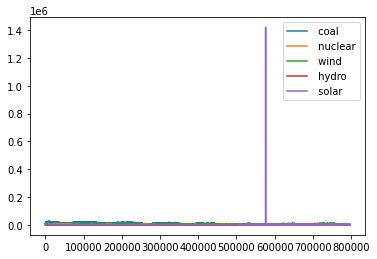

In [7]:
# On affiche le graph
data.plot()

In [8]:
# le nom de toutes les colonnes possède un espace au debut des colonnes, on va s'en debarasser
data = data.rename(columns={" timestamp": "timestamp", " coal": "coal"," nuclear": "nuclear"," wind": "wind"," hydro": "hydro"," solar": "solar"})

In [9]:
# On split le timestamp en Jours et Heures
data['date'] = pd.to_datetime(data['timestamp']).dt.date
data['time'] = pd.to_datetime(data['timestamp']).dt.time

In [10]:
# On extrapole les données manquantes

data.replace(1420000.0 , np.NaN, inplace=True)
data.replace(0 , np.NaN, inplace=True)
data.interpolate(inplace=True)

In [11]:
# On somme l'énergie totale journalière
daily = data.groupby(by=['date']).sum()
print(daily)

                 coal    nuclear       wind     hydro          solar
date                                                                
2012-01-01  2448325.0  2029537.0   760388.0  226484.0       0.000000
2012-01-02  2928449.0  2030808.0   792769.0  223223.0       0.000000
2012-01-03  4430877.0  2005847.0   621916.0  231623.0       0.000000
2012-01-04  4903744.0  2039013.0   764407.0  232221.0       0.000000
2012-01-05  4765032.0  2171748.0   760181.0  238301.0       0.000000
...               ...        ...        ...       ...            ...
2019-07-30    41184.0  1573999.0  1233718.0   73637.0  376470.555768
2019-07-31    41184.0  1606865.0  1685585.0   92945.0  478900.843147
2019-08-01    41184.0  1606940.0   650512.0  117124.0  542324.252101
2019-08-02    41184.0  1592180.0   295905.0  115334.0  596355.781905
2019-08-03    34749.0  1322450.0   155671.0   76132.0  512397.801999

[2772 rows x 5 columns]


array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>], dtype=object)

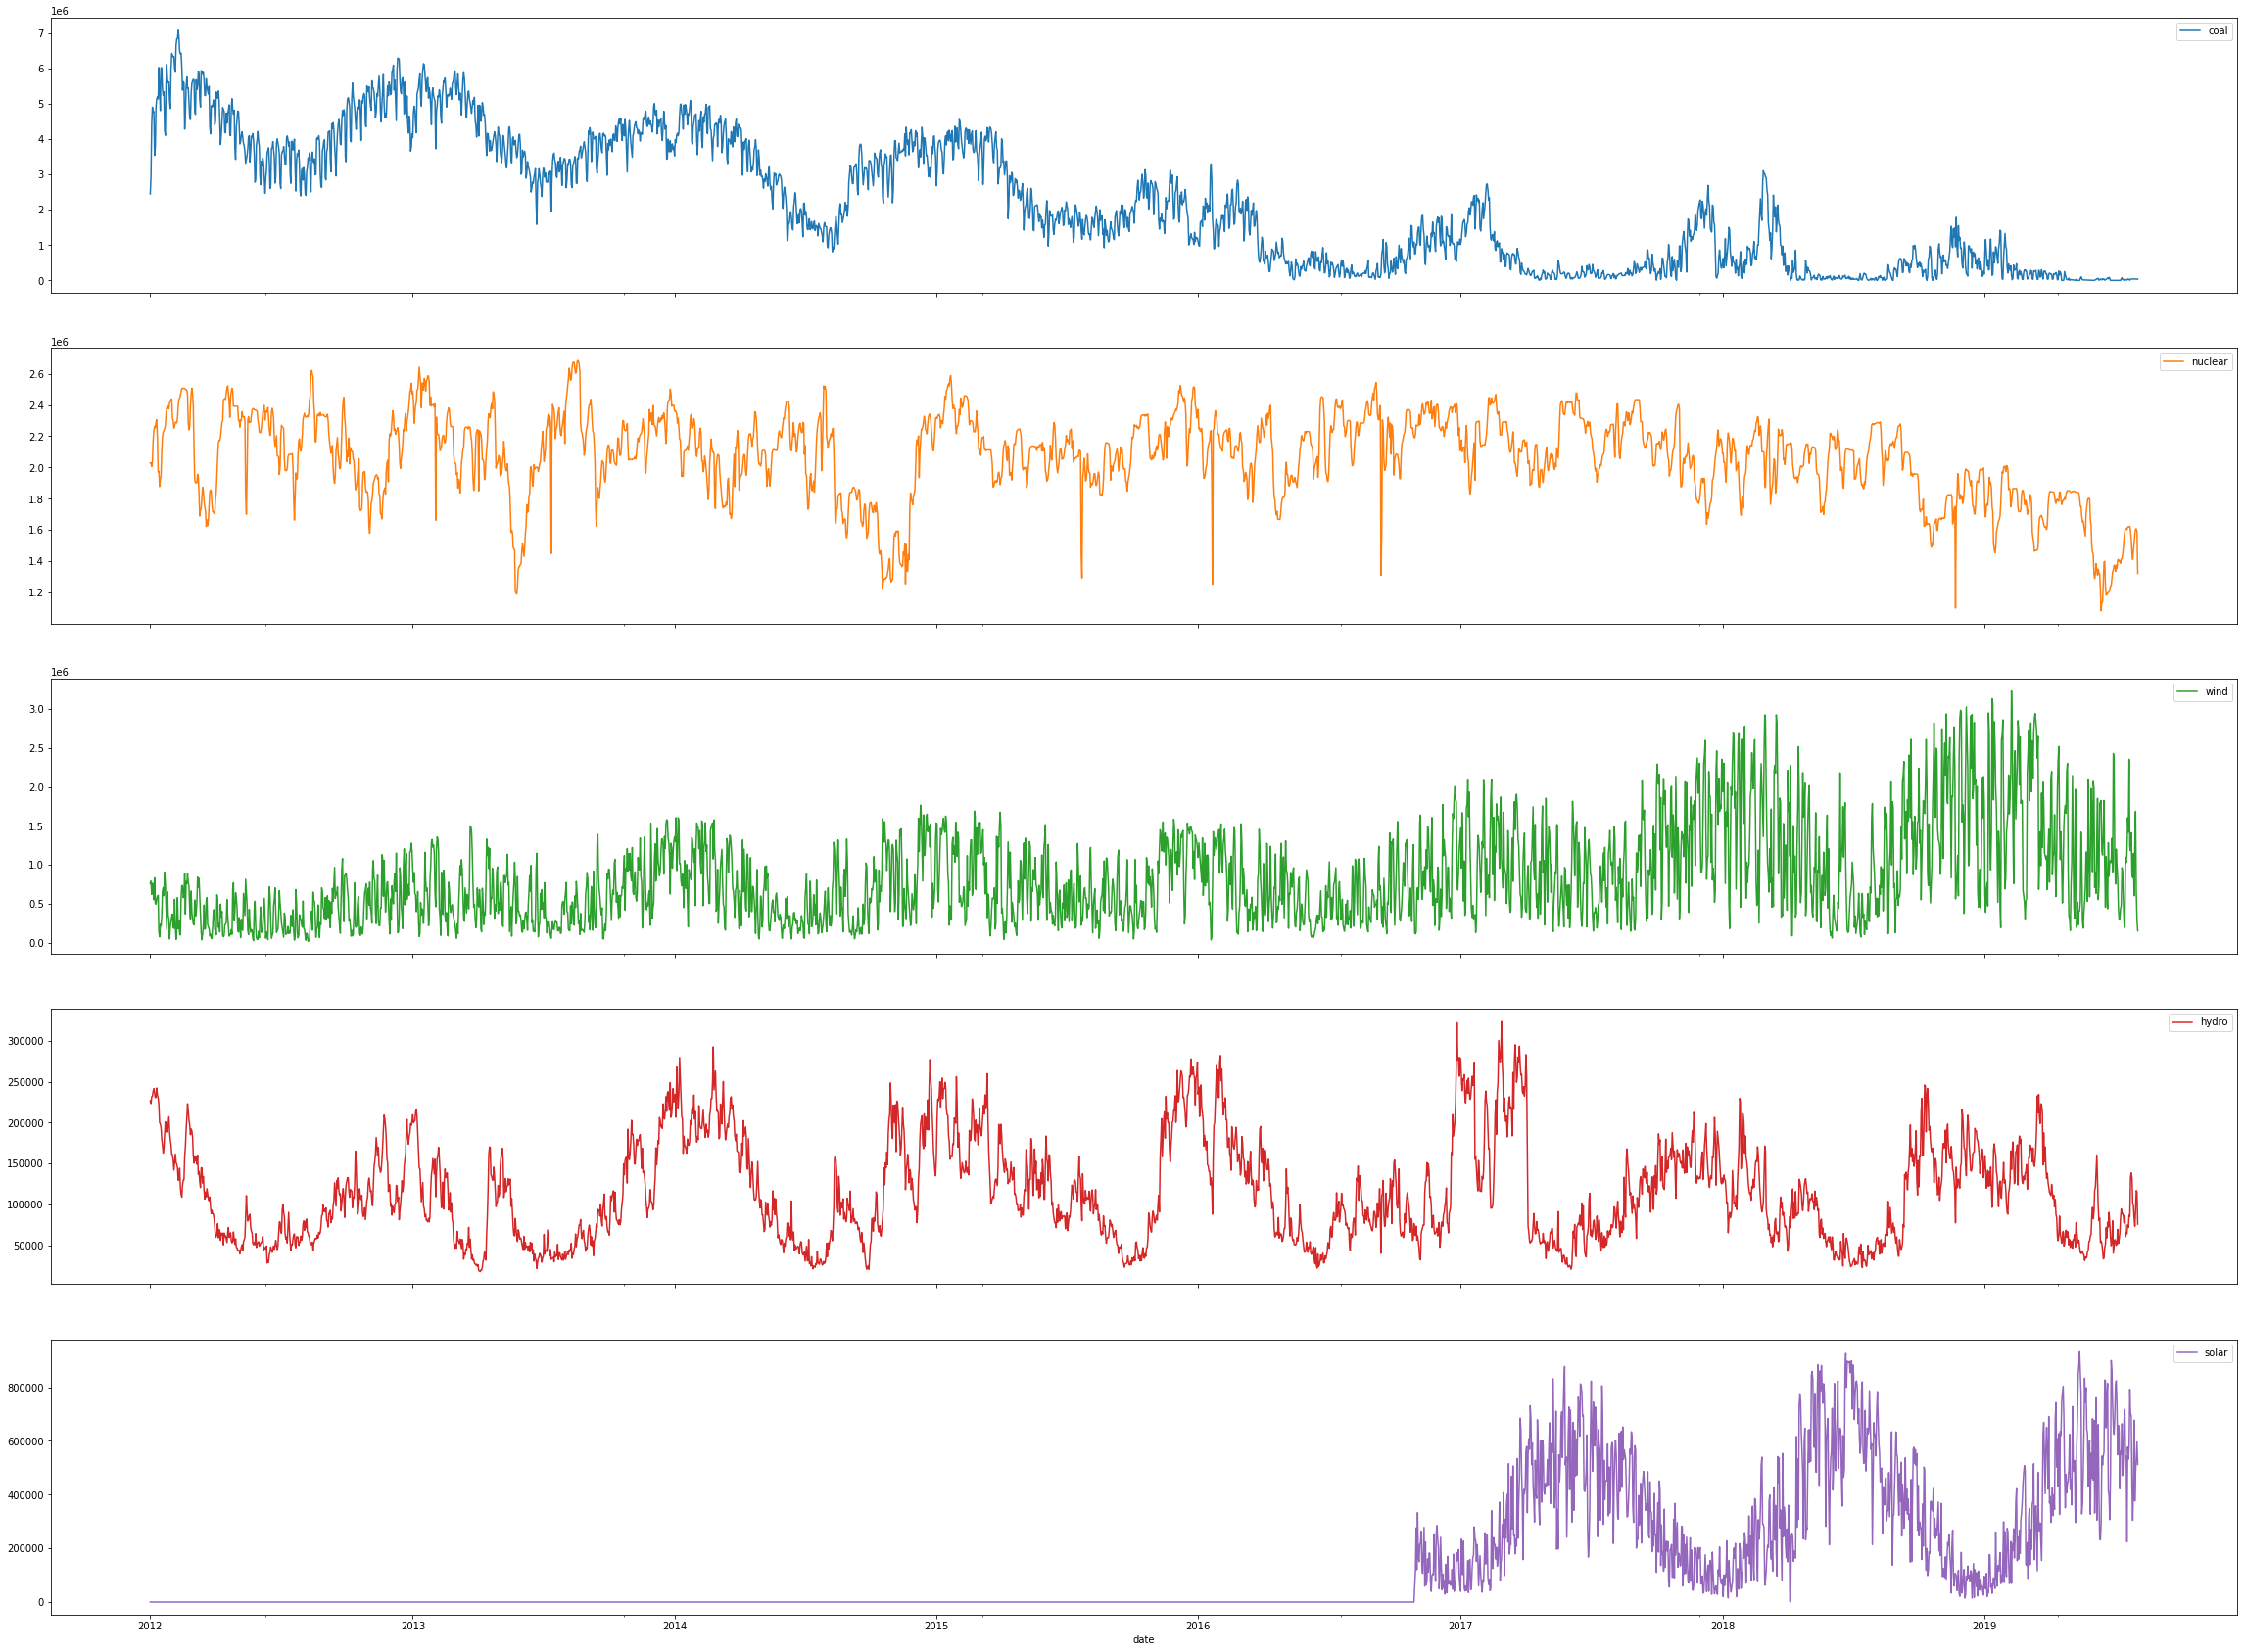

In [12]:
# On choisit la bonne représentation
daily.plot(subplots=True, figsize=(40, 30))